<a href="https://colab.research.google.com/github/Sjoerd-de-Witte/Machine-Learning-2023/blob/main/2_2_Kaggle_Housing_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown -O /tmp/ml.py 174lBNvDBJSVWs3OpNL3a68cnhWIcWYuY
%run /tmp/ml.py

Downloading...
From: https://drive.google.com/uc?id=174lBNvDBJSVWs3OpNL3a68cnhWIcWYuY
To: /tmp/ml.py
100% 1.31k/1.31k [00:00<00:00, 6.04MB/s]


# Participate in the Kaggle Housing Prices Advanced Regression competition

We have already prepared the the dataset, but for more info on the competition, go to:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

The below code will only show you how to load the training set, you will have to add code to learn a model. Cross validate the training set to check for under- and overfitting.

Then finally, there is some code to generate a csv file that you can submit to the Kaggle leaderboard.

In [23]:
from pipetorch.data import DFrame
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from pipetorch.evaluate.study import Study
from sklearn.metrics import mean_squared_error
import numpy as np
from numpy import sqrt, std, mean

Load the training set. SalePrice is the target variable. You do not have to use all variables, a suggestion is to start with LotArea as feature.

In [3]:
df = DFrame.read_from_kaggle('house-prices-advanced-regression-techniques', 'train.csv', 'test.csv')

# Test set

In this case, the PipeTorch DataFrame contains a train and test set. The train set contains 'labels' (Data Science slang for target variable), while the test set does not. In PipeTorch, you will see the entire set though when you inspect the DataFrame, but for the test set the target variable is set to NaN. You can address these subsets as `df.train` and `df.test` which will just give you resp. the train and test parts.

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


# Cross Validation

To validate the model and tune hyperparameters, you will still need a validation set. When you `split(valid_perc)` the DataFrame, you will only split the training set into a train and valid part.

Having the train, valid and test set in a single DataFrame has a few advantages:
- any preprocessing you do will be the same on all subsets (as it probably should).
- when you scale the data, you should learn a scaler on the training set only, then apply the same scaler on the validation and test set as well. PipeTorch automatically takes care of this.

# Prepare the data

I this case, you may not want to slice out the columns you do not use. When we submit the results to Kaggle, we need the `Id`'s of these houses, but we do not want to use that as an input feature. You can use `columnx()` and `columny()` to keep all columns, but use only those features in your experiment. You can also invert the feature selection by using `columnx(omit=True)` and the target variables are omitted by default.

In [5]:
# Use LotArea is the feature, SalePrice as the target, split the DataFrame into a train/valid part
df = df[['Id', 'LotArea', 'SalePrice']]
df = df.split(valid_size = 0.25).scalex()
df = df.columnx('LotArea').columny('SalePrice')


Add your code to fit a Linear Regression model. Start with just LotArea as input and SalePrice as target variable. If you want, you can add another numerical feature later, but do pick one that make sense (for example, Id would probably not make sense, why?).

Note: `data.train_X` is the same as `data.train.X`. In fact, `data.train` will give you the training subset of the PipeTorch DataFrame that is ready to generate the data for use with SKLearn (e.g. create the X and y, but also make plots). When you call `X` or `y`, the specified preprocessing is performed (selecting the features, scaling, categorizing, etc.).

In [6]:
# Instantiate a LinearRegression model and fit it to the training set
model = LinearRegression()
model.fit(df.train_X, df.train_y)

LinearRegression()

In [14]:
# What is the root mean squared error?
sqrt(mean_squared_error(df.valid_y, model.predict(df.valid_X)))

70399.59093676977

In [16]:
# what is the standard devation?
np.std(df.valid_y - model.predict(df.valid_X))

70357.13603578796

# Polynomials

See what happens when you add polynomials and draw a validation curve to see which value for polynomial degree is best.

Note, when using higher-order polynomials, the model is often improved when the data is **scaled**. However, when the target variable is also scaled this no longer reflects salesprices on a similar scale. The most simple solution for now is to not scale the target variable by using `scalex()` instead of `scale()`. Alternatively, we could inverse the scaling transformation, but we will see how to do that later in this course.

# Ridge

These regularized versions of Linear Regression have a hyperparameter to control the amount of regularization. Make sure to tune that.

In [35]:
# Replace the Linear Regression model with a Ridge (or Lasso) model. Does that improve the results?
study = Study.create_study('mse_valid',
                          directions=['minimize'])

def trial(trial):
    alpha = trial.suggest_float('alpha', 1e-6, 3000, log=True)

    model = Ridge(alpha=alpha)
    model.fit(df.train_X, df.train_y)

    pred_y = model.predict(df.valid_X)
    mse_valid = mean_squared_error(df.valid_y, pred_y)

    return sqrt(mse_valid)

study.optimize(trial, n_trials = 100)

[I 2023-09-28 08:23:13,451] A new study created in memory with name: no-name-629235dd-66ef-4723-88ba-218c0c6fc374
[I 2023-09-28 08:23:13,508] Trial 0 finished with value: 70416.74513997755 and parameters: {'alpha': 7.435963504926747}. Best is trial 0 with value: 70416.74513997755.
[I 2023-09-28 08:23:14,127] Trial 1 finished with value: 70399.59301911772 and parameters: {'alpha': 0.0008980479670427879}. Best is trial 1 with value: 70399.59301911772.
[I 2023-09-28 08:23:14,534] Trial 2 finished with value: 70399.59213140461 and parameters: {'alpha': 0.0005152064531768398}. Best is trial 2 with value: 70399.59213140461.
[I 2023-09-28 08:23:14,812] Trial 3 finished with value: 70399.59116286652 and parameters: {'alpha': 9.750800782941659e-05}. Best is trial 3 with value: 70399.59116286652.
[I 2023-09-28 08:23:15,113] Trial 4 finished with value: 71429.81346370009 and parameters: {'alpha': 649.2049970439913}. Best is trial 3 with value: 70399.59116286652.
[I 2023-09-28 08:23:15,375] Trial 

<Axes: xlabel='parametersetting'>

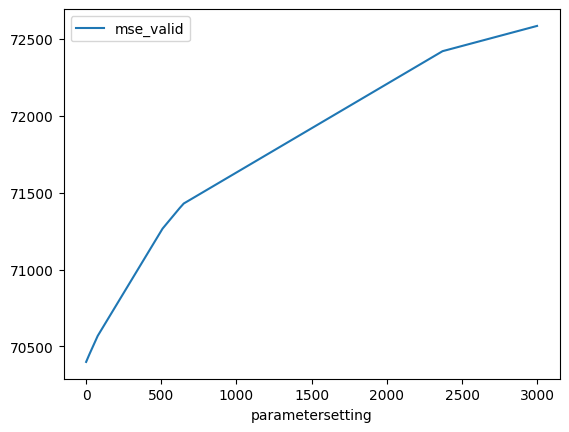

In [36]:
study.plot_targets()

# Submission

To submit you results, you have to create a .csv file for the **test set**. You can follow these steps. You can generate predictions on the test set the same way you do for the train and valid set. You can fill in these results in the `SalePrice` column of the test set and use the `.to_csv` to export what is needed to a .csv file.

In [30]:
# generate predictions of the model that was trained on the training set
# do not learn a new model here!
y_pred = model.predict(df.test_X)

In [31]:
# add the predictions as a new column SalePrice
results = df.test.add_column(y_pred, 'SalePrice')

In [32]:
results[['Id', 'SalePrice']]

,Id,SalePrice
1460,1461,183571.695417
1461,1462,188445.858549
1462,1463,187640.562032
1463,1464,180542.158862
1464,1465,171377.995060
...,...,...
2914,2915,165722.491600
2915,2916,165645.094681
2916,2917,199010.538033
2917,2918,181395.367758


In [33]:
# the competition requires that you create a .csv file to submit
results[['Id', 'SalePrice']].to_csv('boston_housing_results.csv', index=False, header=True)

After running the last cell, you can find and download your .csv file from the Jupyter's file list. Submit it to see what your score is on the leaderboard!!!

In [ ]:
halt_notebook()